Данные получены с портала kaggle, которые предоставил разработчик методом парсинга веб-страниц на selenium и bs4. Содержатся более 1000 полезных записей с сайта Sephora. Данные о товарах красоты.

id - Идентификатор продукта на веб-сайте Sephora.

brand - Торговая марка продукта на веб-сайте Sephora.

category - Категория продукта на веб-сайте Sephora.

name - Название продукта на веб-сайте Sephora.

size - Размер товара 

rating - Рейтинг товара

numberofreviews - Количество отзывов о продукте

love - Количество людей, которым понравился продукт

price - Цена товара

value_price Стоимость товара (для товаров со скидкой)

URL - ссылка на продукт

MarketingFlags - Маркетинговые флаги продукта с веб-сайта, если они были 
эксклюзивными или продавались только через Интернет.

MarketingFlags_content - Типы маркетинговых флагов продукта. 

options - Варианты, доступные на веб-сайте для продукта, такие как цвета и 
размеры.

details - Подробная информация о продукте доступна на веб-сайте

howtouse - объект Инструкции продукта, если таковые имеются

ingredients Ингредиенты продукта, если таковые имеются

online_only - Если товар продается только онлайн

Exclusive - Если продукт продается исключительно на веб-сайте Sephora

limited_edition - Если продукт выпущен ограниченным тиражом
limitedtimeoffer - Если продукт имеет ограниченное по времени предложение

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')

Считываем датасет в датафрейм

In [5]:
data = pd.read_csv('sephora_website_dataset.csv')

In [164]:
data.sample(5)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
3717,1874437,ILIA,Lip Balm & Treatment,Balmy Nights,0.14 oz/ 4 g,4.0,31,4700,26.0,26.0,...,False,0,no options,What it is:\nA lip exfoliator in a convenient ...,Suggested Usage:\n-Recommended: Use before app...,Helianthus Annuus (Sunflower) Seed Oil*- Sesam...,0,0,0,0
6465,2301984,Peter Thomas Roth,Eye Creams & Treatments,Vital-E™ Microbiome Age Defense Eye Cream,0.5 oz/ 15 mL,4.5,521,4200,55.0,55.0,...,False,0,no options,What it is: An anti-pollution- anti-blue ligh...,Suggested Usage:-Melt transforming solid-to-cr...,-Gamma E Antioxidant Technology: Uses unparal...,0,0,0,0
7061,2164010,SEPHORA COLLECTION,False Eyelashes,One Two Lash Magnetic Lashes,no size,3.5,173,8200,69.0,69.0,...,True,exclusive,no options,What it is: A set of two pairs of easy-to-wear...,Suggested Usage:To apply by hand:-After applyi...,Cruelty-free Synthetic Eyelashes- Micro-magnets,0,1,0,0
5720,2226801,Moschino,Perfume Gift Sets,MOSCHINO TOY 2 Mini Duo,2 x 0.17oz/5mL,4.0,11,3200,20.0,20.0,...,False,0,no options,Fragrance Family: FreshScent Type: Fresh Flora...,Suggested Usage:-Fragrance is intensified by t...,Alcohol Denat. (Sd Alcohol 39-C)- Fragrance- E...,0,0,0,0
2342,2269918,Dr. Barbara Sturm,Face Serums,Calming Serum,1 oz/ 30 mL,4.0,6,1100,250.0,250.0,...,False,0,no options,What it is: \nAn ultra-soothing- plant-based ...,Suggested Usage:\n-Use in the morning and even...,-Complex of Cardiospermum- Echium- and Sunflo...,0,0,0,0


Берем информацию о столбцах-признаках


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7766 entries, 0 to 7765
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7766 non-null   int64  
 1   brand                   7766 non-null   object 
 2   category                7766 non-null   object 
 3   name                    7766 non-null   object 
 4   size                    7765 non-null   object 
 5   rating                  7765 non-null   float64
 6   number_of_reviews       7765 non-null   float64
 7   love                    7765 non-null   float64
 8   price                   7765 non-null   float64
 9   value_price             7765 non-null   float64
 10  URL                     7765 non-null   object 
 11  MarketingFlags          7765 non-null   object 
 12  MarketingFlags_content  7765 non-null   object 
 13  options                 7765 non-null   object 
 14  details                 7765 non-null   

Посмотрим на наименования товаров

In [11]:
data.name.value_counts(dropna=False)

Blush                                              4
Lipstick                                           3
The Foundation Brush                               3
Lip Gloss                                          3
Discovery Set                                      3
                                                  ..
On the Rocks Charcoal Scalp Scrub                  1
Flat Mate Boar Bristle Brush                       1
Blonde Ale Vibrance-Boosting Brightening Powder    1
Southern Belle Volume-Boosting Powder              1
Good Genes                                         1
Name: name, Length: 7720, dtype: int64

Отдельно посмотрим на числовые переменные

In [8]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=data.select_dtypes(include=numeric)
df_num.head(3)

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,4.0,4,3002,66.0,75.0,1.0,0.0,0.0,0.0
1,2044816,4.5,76,2700,66.0,66.0,1.0,0.0,0.0,0.0
2,1417567,4.5,26,2600,180.0,180.0,1.0,0.0,0.0,0.0


Удаляем столбец идентификатора из датафрейма с числовыми признаками

In [9]:
df_num.drop("id", axis=1, inplace=True)

Выводим среднее, стандартное отклонение, минимум, максимум и межквартильные диапазоны для числовых признаков

In [75]:
df_num.describe()

,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
count,7765.000000,7765.000000,7.765000e+03,7765.000000,7765.000000,7765.000000,7765.000000,7765.000000,7765.000000
mean,4.008757,282.647778,1.589702e+04,50.129531,51.929005,0.243400,0.258983,0.086929,0.000386
std,0.976930,870.373910,4.227677e+04,46.221270,48.656629,0.429162,0.438104,0.281748,0.019653
min,0.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,11.000000,1.700000e+03,25.000000,25.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,50.000000,4.900000e+03,35.000000,36.000000,0.000000,0.000000,0.000000,0.000000
75%,4.500000,216.000000,1.360000e+04,59.000000,60.000000,0.000000,1.000000,0.000000,0.000000
max,5.000000,19000.000000,1.300000e+06,549.000000,549.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
print("Среднее значение по численным признакам: ", df_num.mean(axis=0, numeric_only=True))
print("Медиана по численным признакам: ", df_num.median(axis=0, numeric_only=True))

Среднее значение по численным признакам:  rating                    4.025108
number_of_reviews       305.164515
love                  15472.013391
price                    49.578910
value_price              51.477762
online_only               0.241148
exclusive                 0.147847
limited_edition           0.085167
limited_time_offer        0.000957
dtype: float64
Медиана по численным признакам:  rating                   4.0
number_of_reviews       56.0
love                  4700.0
price                   34.0
value_price             36.0
online_only              0.0
exclusive                0.0
limited_edition          0.0
limited_time_offer       0.0
dtype: float64


In [11]:
print("Мода по численным признакам: ", df_num.mode())

Мода по численным признакам:     rating  number_of_reviews  love  price  value_price  online_only  \
0     4.5               1000  1500   25.0         25.0          0.0   

   exclusive  limited_edition  limited_time_offer  
0        0.0              0.0                 0.0  


Рассмотрим корреляцию между признаками


In [160]:
df_num.corr()

,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
rating,1.000000,0.083341,0.090158,0.006148,-0.013965,-0.137183,0.007340,-0.143148,0.006532
number_of_reviews,0.083341,1.000000,0.752814,-0.089047,-0.094407,-0.142167,0.021479,-0.067116,0.000814
love,0.090158,0.752814,1.000000,-0.091090,-0.093241,-0.137933,0.070707,-0.042840,-0.002975
price,0.006148,-0.089047,-0.091090,1.000000,0.982303,0.122468,-0.163717,0.033732,-0.010760
value_price,-0.013965,-0.094407,-0.093241,0.982303,1.000000,0.136960,-0.142380,0.103902,-0.010949
online_only,-0.137183,-0.142167,-0.137933,0.122468,0.136960,1.000000,-0.064036,0.114728,-0.011151
exclusive,0.007340,0.021479,0.070707,-0.163717,-0.142380,-0.064036,1.000000,0.160888,0.003337
limited_edition,-0.143148,-0.067116,-0.042840,0.033732,0.103902,0.114728,0.160888,1.000000,0.017194
limited_time_offer,0.006532,0.000814,-0.002975,-0.010760,-0.010949,-0.011151,0.003337,0.017194,1.000000


Построим для наглядности тепловую карту коррелирующих признаков

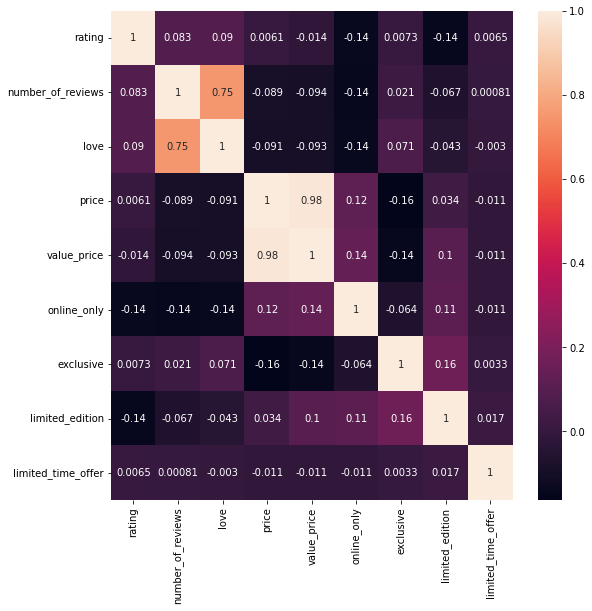

In [110]:
plt.figure(figsize=(9,9))
sns.heatmap(df_num.corr(),annot=True)

Вывод:

цена на товар и цена на товар со скидкой сильно коррелируют между собой, это связано с тем, что в большинстве случаев значения этих двух признаков совпадают между собой. 

Количество отзывов и количество лайков хорошо коррелируют, получается, что чем больше отзывов, тем больше лайков и наоборот, это также говорит о необходимости либо ввода нового признака вместо двух, либо удаления одного из них.

Рейтинг товара и количество отзывов отрицательно коррелируют. Получается, что чем больше товаров продается онлайн, тем меньше отзывов о нем оставляют потребители.

Визуализируем данные по брендам

In [156]:
top_5_brands = data.loc[data.rating== 5]
top_5_brands.groupby(['brand','rating']).agg(lambda x: x.value_counts().index[0])[:5]

,,id,category,name,size,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
brand,rating,,,,,,,,,,,,,,,,,,,
AERIN,5.0,1699222,Perfume,Rose De Grasse,1.7 oz/ 50 mL,12.0,1700.0,235.0,235.0,https://www.sephora.com/product/rose-de-grasse...,True,online only,- 1.7 oz/ 50 mL Eau de Parfum Spray - 3.4 oz...,Fragrance Family:\n Floral\n\nScent Type:\n Cl...,no instructions,unknown,1.0,0.0,0.0,0.0
ALTERNA Haircare,5.0,2140374,Hair Styling Products,CAVIAR Anti-Aging® Infinite Color Hold Topcoat...,4.2 oz/ 125 mL,16.0,2400.0,32.0,32.0,https://www.sephora.com/product/caviar-infinit...,True,online only,no options,Which hair type is it good for?✔ Straight✔ Wav...,Suggested Usage:-Spray evenly through dry hair...,-Red Raspberry Leaf Oil and Sunflower Seed Oi...,1.0,0.0,0.0,0.0
AMOREPACIFIC,5.0,2150225,Value & Gift Sets,TIME RESPONSE Skin Reserve Crème,no size,8.0,1100.0,150.0,150.0,https://www.sephora.com/product/time-response-...,True,online only,no options,What it is: A luxurious anti-aging face cream...,Suggested Usage:-Scoop a dime-sized amount of ...,Camellia Sinensis Leaf Water- Butylene Glycol-...,1.0,0.0,0.0,0.0
Acqua Di Parma,5.0,1284462,Perfume Gift Sets,Colonia Essenza,no size,1.0,719.0,120.0,120.0,https://www.sephora.com/product/colonia-essenz...,True,online only,no options,The newest Eau de Cologne from Acqua di Parma ...,Suggested Usage:-Fragrance is intensified by t...,Alcohol Denat.- Water- Fragrance- Limonene- Hy...,1.0,0.0,0.0,0.0
Aether Beauty,5.0,2189975,Eye Palettes,Solstice Eyeshadow Palette,no size,116.0,6100.0,58.0,58.0,https://www.sephora.com/product/summer-solstic...,False,0,no options,What it is: A palette of 12 golden hour shades...,no instructions,-Organic Coconut Oil: Creates a buttery smoot...,0.0,0.0,0.0,0.0


Топ 5 категорий товаров, у которых цена выше средней цены среди каждой категории

In [155]:
top_5_categories = data.loc[data.price > data['price'].mean()]
top_5_categories.groupby(['category','price']).agg(lambda x: x.value_counts().index[0])[:5]

id                brand  \
category   price                                 
Aftershave 60.0   1824416                 Dior   
Anti-Aging 59.0   2349934  Clarisonic Skincare   
           99.0   2267672           DERMAFLASH   
           125.0  2194306      StackedSkincare   
           149.0  2147205               NuFACE   

                                                               name  \
category   price                                                      
Aftershave 60.0                            Sauvage After Shave Balm   
Anti-Aging 59.0               Anti-Aging + Firming 3D Face Sculptor   
           99.0   DERMAPORE Ultrasonic Pore Extractor & Serum In...   
           125.0                             Microneedling Tool 2.0   
           149.0                          FIX Line Smoothing Device   

                            size  rating  number_of_reviews     love  \
category   price                                                       
Aftershave 60.0   3.4 oz/ 101 mL     5.0                3.0    455.0   
Anti-Aging 59.0          no size     3.5               50.0   8800.0   
           99.0          no size     4.0               51.0  12600.0   
           125.0         no size     5.0              102.0   4700.0   
           149.0         no size     4.0              233.0   3200.0   

                  value_price  \
category   price                
Aftershave 60.0          60.0   
Anti-Aging 59.0          59.0   
           99.0          99.0   
           125.0        125.0   
           149.0        149.0   

                                                                URL  \
category   price                                                      
Aftershave 60.0   https://www.sephora.com/product/sauvage-after-...   
Anti-Aging 59.0   https://www.sephora.com/product/uplift-firming...   
           99.0   https://www.sephora.com/product/dermapore-ultr...   
           125.0  https://www.sephora.com/product/microneedling-...   
           149.0  https://www.sephora.com/product/fix-line-smoot...   

                  MarketingFlags   MarketingFlags_content     options  \
category   price                                                        
Aftershave 60.0            False                        0  no options   
Anti-Aging 59.0            False                        0  no options   
           99.0             True              online only  no options   
           125.0            True  exclusive · online only  no options   
           149.0            True              online only  no options   

                                                            details  \
category   price                                                      
Aftershave 60.0   What it is:\n A non-oily balm that soothes the...   
Anti-Aging 59.0   What it is:  A powerful anti-aging tool for fa...   
           99.0   What it is:  A unique- two-in-one ultrasonic s...   
           125.0  What it is:  A sustainable Microneedling Tool ...   
           149.0  What it is:  A line-smoothing device that inst...   

                                                         how_to_use  \
category   price                                                      
Aftershave 60.0                                     no instructions   
Anti-Aging 59.0   Suggested Usage:For a visibly anti-aging massa...   
           99.0   Suggested Usage:-Use DERMAPORE up to three tim...   
           125.0  Suggested Usage:-Gently roll the MicroNeedling...   
           149.0  Suggested Usage:-Cleanse skin and apply NuFACE...   

                 ingredients  online_only  exclusive  limited_edition  \
category   price                                                        
Aftershave 60.0      unknown          0.0        0.0              0.0   
Anti-Aging 59.0      unknown          0.0        0.0              0.0   
           99.0      unknown          1.0        0.0              0.0   
           125.0     unknown          1.0        1.0              

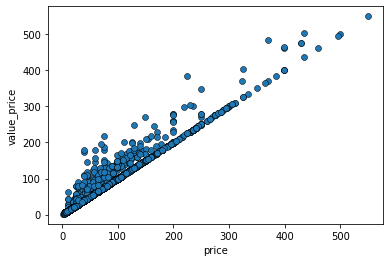

In [136]:
fig, ax = plt.subplots()
_ = plt.scatter(x=data['price'], y=data['value_price'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="price", ylabel="value_price")

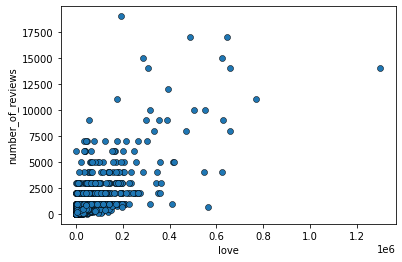

In [138]:
fig, ax = plt.subplots()
_ = plt.scatter(x=data['love'], y=data['number_of_reviews'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="love", ylabel="number_of_reviews")

график ящик с усами по признакам: количество отзывов, лайки, цена, цена со скидкой

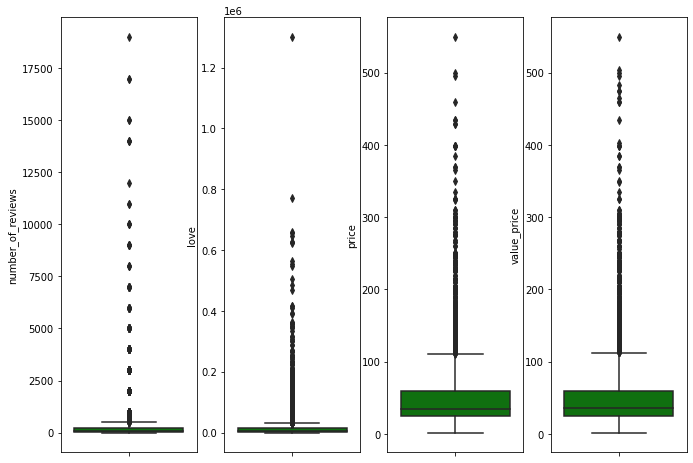

In [140]:
features = ['number_of_reviews', 'love', 'price', 'value_price']
plt.figure(figsize=(20, 8))
for i in range(0, len(features)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=data[features[i]],color='green',orient='v')

Посмотрим на распределение признака цена со скидкой (value_price)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


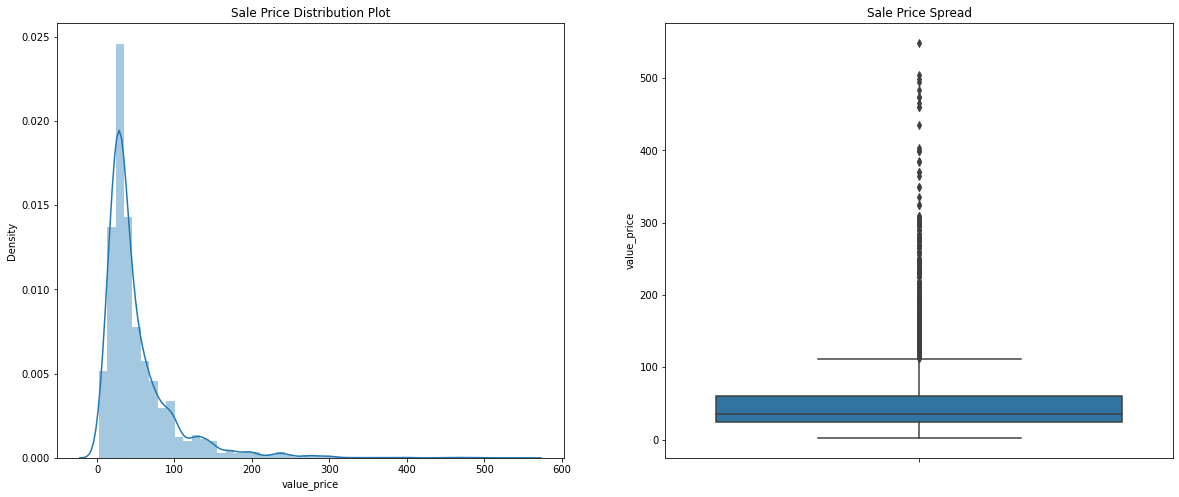

In [141]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('График распределения цены со скидкой')
sns.distplot(data.value_price)

plt.subplot(1,2,2)
plt.title('Распределение цены со скидкой')
sns.boxplot(y=data.value_price)

plt.show()

Данные не симметричны, наблюдаемый максимум в пределах 120 и большинство выбросов за пределами наблюдаемого максимума, большинство значений находятся выше медианы в верхнем квартиле

Проверим его межквартильные диапазоны

In [143]:
print(data.value_price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    7765.000000
mean       51.929005
std        48.656629
min         2.000000
25%        25.000000
50%        36.000000
75%        60.000000
85%        85.000000
90%       102.000000
100%      549.000000
max       549.000000
Name: value_price, dtype: float64


Коэффициент асимметрии: 3.216


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


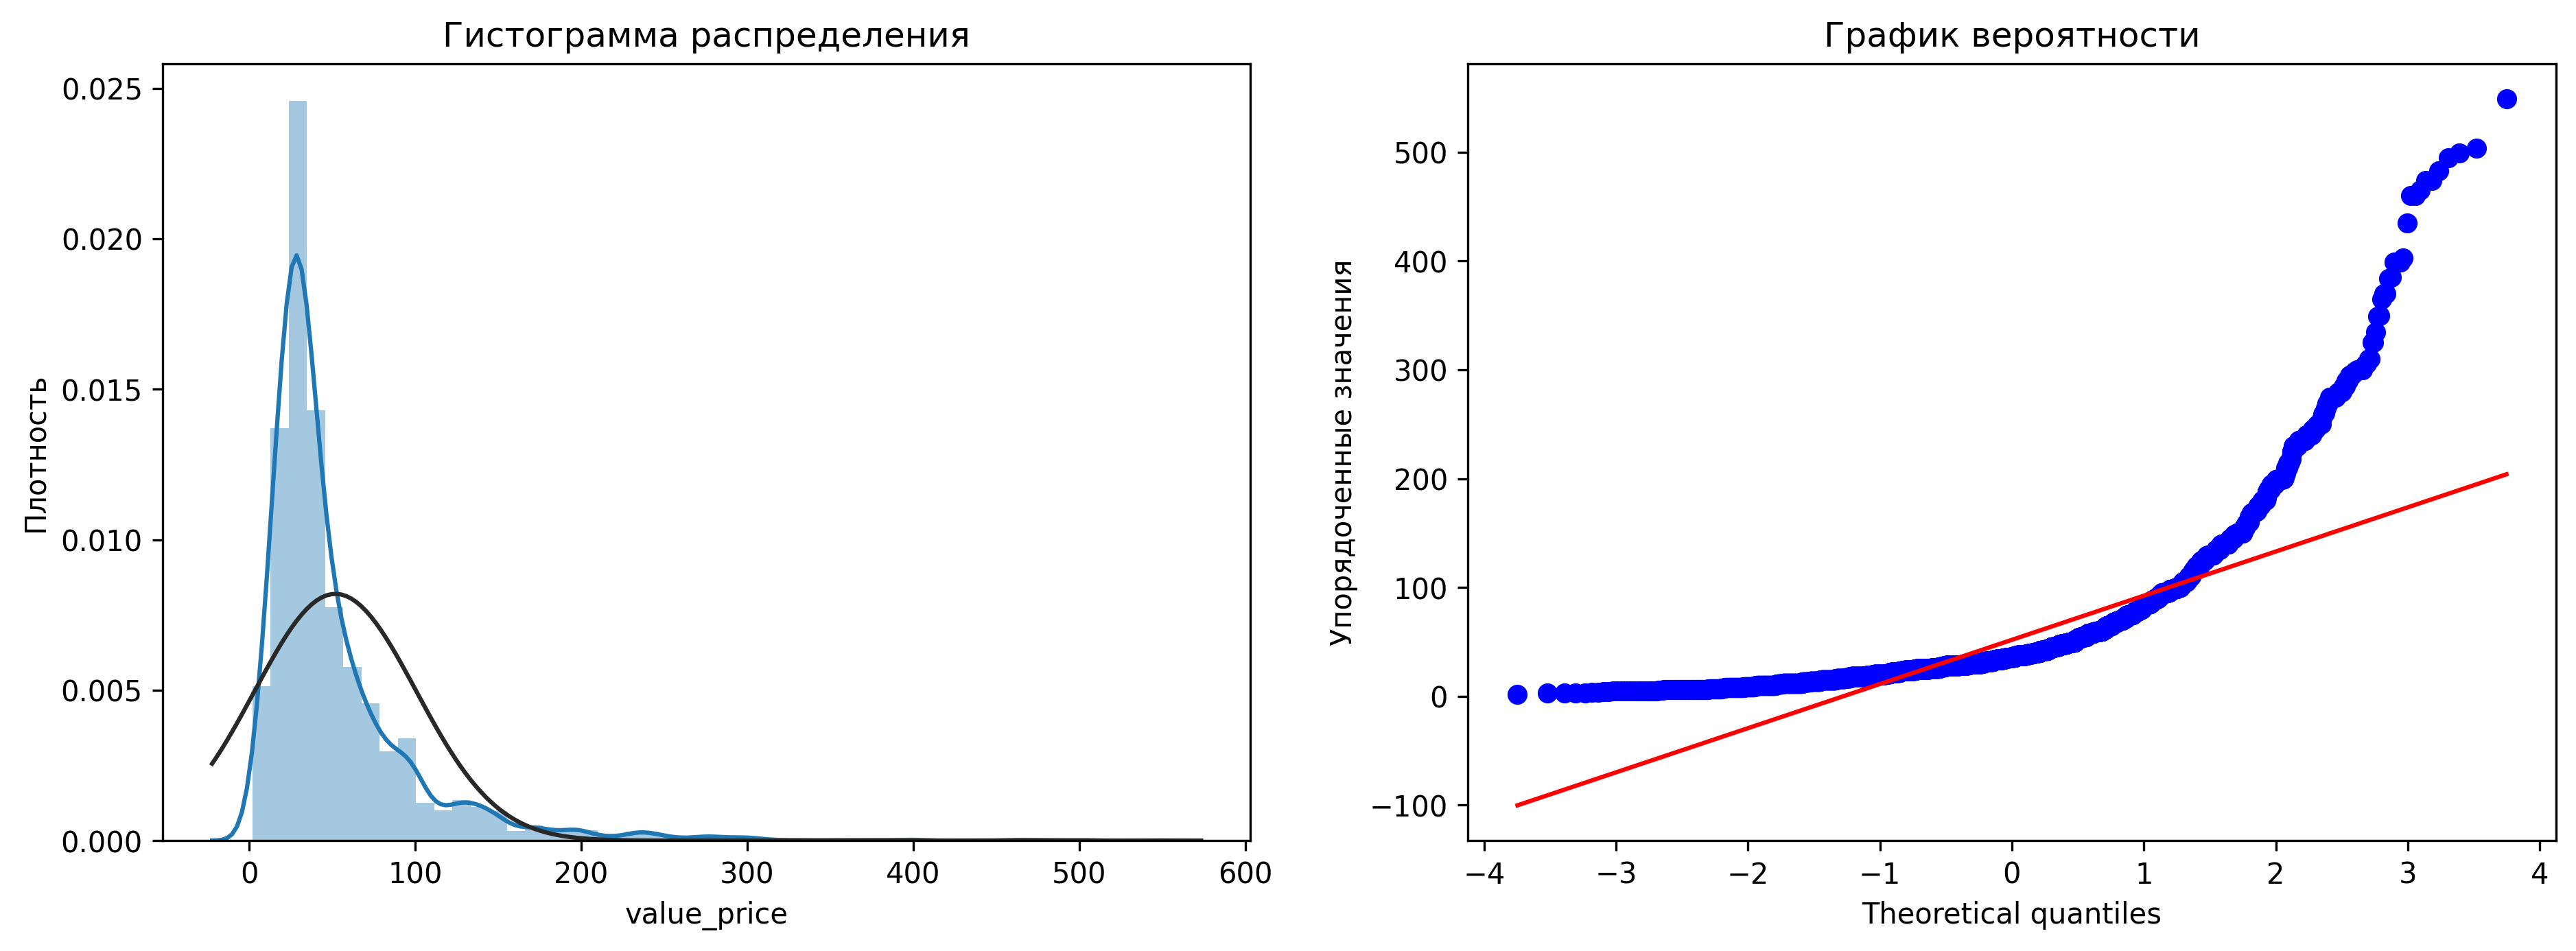

In [151]:
print(f"Коэффициент асимметрии: {round(data.value_price.skew(), 3)}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

sns.distplot(data['value_price'] , fit=stats.norm, ax=ax1)
ax1.set_title('Гистограмма распределения')
ax1.set_ylabel("Плотность")

stats.probplot(data['value_price'], plot=ax2)
ax2.set_title('График вероятности')
ax2.set_ylabel("Упорядоченные значения")

plt.show()

На данной гистограмме распределения слева видно, что асимметрия положительная

# **Проверка гипотез**

Нулевая гипотеза: самый дорогой по цене бренд - AERIN

Альтернативная гипотеза: нет самого дорогого по цене бренда, все примерно одинаковые

Для доказательства используем критерий Стьюдента T-теста

In [103]:
aerin_prices = data[data['brand'] == 'AERIN']['price']
non_aerin_prices = data[data['brand'] != 'AERIN']['price']

In [104]:
aerin_prices = aerin_prices[aerin_prices > 0]
non_aerin_prices = non_aerin_prices[non_aerin_prices > 0]

aerin_prices = (aerin_prices+1).apply(np.log)
non_aerin_prices = (non_aerin_prices+1).apply(np.log)
print('Среднее для aerin_prices:  {}'.format(aerin_prices.mean()))
print('Среднее для non_aerin_prices:  {}'.format(non_aerin_prices.mean()))

Среднее для aerin_prices:  4.389353146000684
Среднее для non_aerin_prices:  3.6655614163858736


In [105]:
import scipy.stats as stats

stats.ttest_ind(a= aerin_prices,
                b= non_aerin_prices,
                equal_var=False) 

Ttest_indResult(statistic=4.096538925403186, pvalue=0.0005122465653833307)

p-значение слишком малое, поэтому мы можем отклонить нулевую гипотезу, это значит, что данные значительно отличаются

Коэффициент Спирмена для установления связи между переменными:

number_of_reviews и price

Предполагается, что чем больше цена на товар, тем меньше о нем отзывов и обратно.

In [152]:
from scipy.stats import spearmanr

# рассчитаем ранговую корреляцию Спирмена и соответствующее значение p
rho, p = spearmanr(data['number_of_reviews'], data['value_price'])
print(rho)
print(p)

-0.1462717980775789
2.1439471402568462e-38


Из вывода мы видим, что ранговая корреляция Спирмена составляет -0,1169, а p-значение меньше 0.05.

Это указывает на то, что существует отрицательная корреляция между количеством отзывов о товаре и его ценой со скидкой. Поэтому предположение о том, что чем дороже товар, тем меньше о нем отзывов имеет место быть


**Логистическая регрессия**

Прогнозируемая переменная: будет ли на товаре маркетинговый флаг в зависимости от цены со скидкой

In [19]:
data['MarketingFlags'] = data.MarketingFlags.map({False:0, True:1})
data_cleaned = data[['value_price', 'MarketingFlags']]

Проверим сбалансированность классов 0 и 1

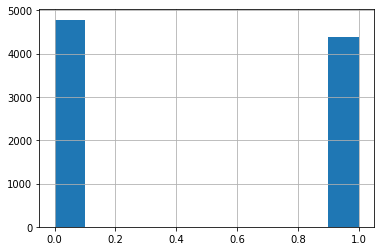

In [29]:
data_cleaned["MarketingFlags"].hist()

Данные имеют сбалансированный характер, поэтому целесообразно обучить модель логистической регрессии

In [21]:
X = data_cleaned.drop('MarketingFlags', axis = 1)
y = data_cleaned['MarketingFlags']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# с помощью StandardScaler приводим данные признака цены к единой шкале от 0 до 1 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
print("X Train: ", X_train.shape)
print("y Train: ", y_train.shape)
print("X test: ", X_test.shape)
print("y test: ", y_test.shape)

X Train:  (7334, 1)
y Train:  (7334,)
X test:  (1834, 1)
y test:  (1834,)


Обучаем модель логистической регрессии

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("b0 и коэффициент регрессии равны: ", model.intercept_, model.coef_)

b0 и коэффициент регрессии равны:  [-0.09287652] [[-0.05028139]]


Вывод отчет о классификации с мерами точности обученной модели: precision, recall, F1-Score и Support

In [28]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68       949
           1       0.00      0.00      0.00       885

    accuracy                           0.52      1834
   macro avg       0.26      0.50      0.34      1834
weighted avg       0.27      0.52      0.35      1834

